In [67]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import chardet
import sweetviz as sv

In [68]:
# Verificar qual o encoding do arquivo
with open("ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [69]:
# Lendo o arquivo e selecionando as colunas
df = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252', usecols=[1,2,3,4,5,6,7,8,9,10,11,12])

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [4]:
# Relatorio Geral
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [70]:
# Tirando o espaço no nome das colunas
df.columns = map(str.strip, df.columns)

In [71]:
# Verificando o nome das colunas
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged'],
      dtype='object')

In [72]:
# Verificando o typo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   name           323746 non-null  object
 1   category       323745 non-null  object
 2   main_category  323750 non-null  object
 3   currency       323750 non-null  object
 4   deadline       323750 non-null  object
 5   goal           323750 non-null  object
 6   launched       323750 non-null  object
 7   pledged        323750 non-null  object
 8   state          323750 non-null  object
 9   backers        323750 non-null  object
 10  country        323750 non-null  object
 11  usd pledged    319960 non-null  object
dtypes: object(12)
memory usage: 29.6+ MB


In [73]:
# Valores duplicados
df.duplicated().sum()

0

In [74]:
# Verificando valores valores missing
df.isna().sum()

name                4
category            5
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged      3790
dtype: int64

In [75]:
# Porcentagem total de valores missing
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells)*100

0.09778635778635777

In [76]:
# Visualizando valores missing
df.loc[df['name'].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
142830,NaN,Narrative Film,Film & Video,USD,2012-02-29 15:04:00,200000,2012-01-01 12:35:31,100,failed,1,US,100
262901,NaN,Video Games,Games,GBP,2013-01-06 23:00:00,2000,2012-12-19 23:57:48,196,failed,12,GB,317.7284362
265251,NaN,Product Design,Design,USD,2016-07-18 05:01:47,2500,2016-06-18 05:01:47,0,suspended,0,US,0
289847,NaN,Painting,Art,USD,2011-12-05 05:59:00,35000,2011-11-06 23:55:55,220,failed,5,US,220


In [77]:
# Deletando valores missing
df['name'].dropna(inplace=True)

In [78]:
# Verificando valores missing
df['name'].isna().sum()

4

In [79]:
# Visualizando valores missing
df.loc[df['category'].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
36671,I am Rupert,NaN,Webseries,Film & Video,GBP,2014-05-16 22:25:57,2000,2014-03-27 21:25:57,5,failed,1,GB
41069,BlanketPals TM,NaN,Interactive Design,Design,USD,2015-03-25 20:51:48,9750,2015-02-23 21:51:48,10890.45,successful,107,US
63544,{string&&loop} Knitting Craft with Code,NaN,Apparel,Fashion,USD,2016-05-28 00:00:00,1800,2016-04-29 21:04:40,2308,successful,119,US
96753,American Pin-up Revisitedd,NaN,Art,Art,USD,2014-04-03 17:52:09,7500,2014-03-04 17:52:09,100,failed,1,US
269930,Uplift: The Wearable iPhone Case with Zipline&...,NaN,Design,Design,USD,2011-04-04 20:08:17,50000,2011-03-05 20:08:17,1665,canceled,10,US


In [80]:
# Deletando valores missing
df['category'].dropna(inplace=True)

In [81]:
# Visualizando valores missing
df['category'].isna().sum()

5

In [82]:
# Visualizando valores missing
df.loc[df['usd pledged'].isna()].sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
181253,More Than Crumbs Memoir,Publishing,Publishing,USD,2015-09-30 21:21:08,5000,2015-08-31 21:21:08,0,undefined,0,"N,""0",NaN
68798,Canticles: The Soundtrack Volume I,Music,Music,USD,2016-04-17 09:29:32,1500,2016-03-18 08:29:32,3425,undefined,0,"N,""0",NaN
195588,Acoustic Scenery,Music,Music,CAD,2015-02-19 03:57:04,2000,2015-01-20 03:57:04,0,undefined,0,"N,""0",NaN
119812,The Great Gatsby (short film adaptation),Film & Video,Film & Video,GBP,2015-12-25 13:44:27,800,2015-11-25 13:44:27,832,undefined,0,"N,""0",NaN
76590,I Never Knew,Film & Video,Film & Video,USD,2015-02-17 20:00:37,2750,2015-01-18 20:00:37,2775,undefined,0,"N,""0",NaN


In [83]:
# Preenchendo valores missing com '0'
df['usd pledged'].fillna(0, inplace=True)

In [84]:
#Visualizando valores missing
df['usd pledged'].isna().sum()

0

In [85]:
# Procurando por Inconsistências 
df_m = df['currency'].unique()
df_m.sort()
df_m

array([' Be active!', ' Religion ', ' clothing company',
       ' tango and culture', 'AUD', 'Apparel', 'Art', 'CAD', 'CHF',
       'Comics', 'Crafts', 'DKK', 'Dance', 'Design', 'EUR', 'Fashion',
       'Film & Video', 'Food', 'GBP', 'Games', 'HKD', 'Journalism', 'MXN',
       'Music', 'NOK', 'NZD', 'Nonfiction', 'Painting', 'Photography',
       'Publishing', 'Rock', 'SEK', 'SGD', 'Software', 'Technology',
       'Theater', 'USD'], dtype=object)

In [86]:
# Retirando espaço em branco
df['currency'] = df['currency'].str.strip()

In [87]:
# Procurando por Inconsistências 
df_m = df['currency'].unique()
df_m.sort()
df_m

array(['AUD', 'Apparel', 'Art', 'Be active!', 'CAD', 'CHF', 'Comics',
       'Crafts', 'DKK', 'Dance', 'Design', 'EUR', 'Fashion',
       'Film & Video', 'Food', 'GBP', 'Games', 'HKD', 'Journalism', 'MXN',
       'Music', 'NOK', 'NZD', 'Nonfiction', 'Painting', 'Photography',
       'Publishing', 'Religion', 'Rock', 'SEK', 'SGD', 'Software',
       'Technology', 'Theater', 'USD', 'clothing company',
       'tango and culture'], dtype=object)

In [88]:
# Transformando a primeira letra em Maiuscula 
df['currency'] = df['currency'].str.capitalize()

In [89]:
# Procurando por Inconsistênsias
df_m = df['currency'].unique()
df_m.sort()
df_m

array(['Apparel', 'Art', 'Aud', 'Be active!', 'Cad', 'Chf',
       'Clothing company', 'Comics', 'Crafts', 'Dance', 'Design', 'Dkk',
       'Eur', 'Fashion', 'Film & video', 'Food', 'Games', 'Gbp', 'Hkd',
       'Journalism', 'Music', 'Mxn', 'Nok', 'Nonfiction', 'Nzd',
       'Painting', 'Photography', 'Publishing', 'Religion', 'Rock', 'Sek',
       'Sgd', 'Software', 'Tango and culture', 'Technology', 'Theater',
       'Usd'], dtype=object)

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [129]:
dfcurrency = df['currency'].value_counts().nlargest(5)
dfcurrency

Usd    260298
Gbp     27968
Cad     12197
Eur     11555
Aud      6347
Name: currency, dtype: int64

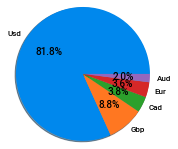

In [143]:
plt.figure(figsize=(2,5))
plt.pie(dfcurrency,labels=dfcurrency.index, shadow=True, autopct='%1.1f%%',radius=1.5)
plt.show()